In [1]:
%load_ext autoreload
%autoreload 2

import torch
import numpy as np
from scipy.stats import genpareto, t
import matplotlib.pyplot as plt

In [ ]:
tail = 1.5
# x = genpareto.rvs(c=1.5, scale=1., size=10_000)
x = np.abs(t.rvs(df=tail, scale=1., size=100_000))
x_torch = torch.tensor(x)

In [ ]:
lower_xi, lower_mu, lower_sigma = genpareto.fit(
    x_torch[x_torch > beta] - beta.detach().cpu().numpy(), floc=0
    # , f0=tail
)

In [53]:
b = 0.95

x_torch = x_torch.sort().values
upper_idx = int(b * len(x_torch)) - 1
# upper_idx = 0
beta = x_torch[upper_idx]

In [57]:
%%timeit
lower_xi, lower_mu, lower_sigma = genpareto.fit(
    x_torch[x_torch > beta].detach().cpu().numpy() - beta.detach().cpu().numpy(), floc=0
    # , f0=tail
)

15.7 ms ± 383 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [55]:
%%timeit
lower_xi, lower_mu, lower_sigma = genpareto.fit(
    x_torch[x_torch > beta] - beta.detach().cpu().numpy(), floc=0, f0=tail
)

6.73 ms ± 69.5 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [56]:
lower_xi, lower_mu, lower_sigma

(0.64235654877698, 0, 3.928292930014833)

In [42]:
from tailnflows.torch_tails import compute_log_binned_pdf
from marginal_tail_adaptive_flows.utils.tail_estimation import get_distribution


number_of_bins = 10

# 
sorted_x = np.sort(x)
torch_sorted_x = x_torch.sort().values

orig_x_pdf, orig_y_pdf = get_distribution(sorted_x, number_of_bins=number_of_bins)
log_x_pdf, y_pdf = compute_log_binned_pdf(torch_sorted_x, number_of_bins=number_of_bins)

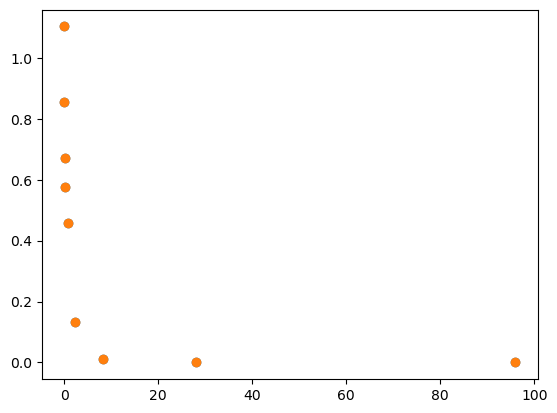

In [43]:
plt.scatter(orig_x_pdf, orig_y_pdf)
plt.scatter(log_x_pdf, y_pdf)

In [44]:
from tailnflows.torch_tails import compute_ccdf
from marginal_tail_adaptive_flows.utils.tail_estimation import get_ccdf

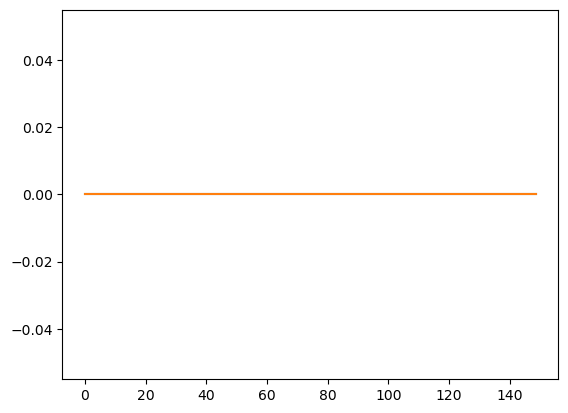

In [45]:
val, ccdf = get_ccdf(sorted_x)

t_val, t_ccdf = compute_ccdf(torch_sorted_x)

plt.plot(val, ccdf - t_ccdf.numpy())
plt.plot(t_val, t_val.numpy() - val)

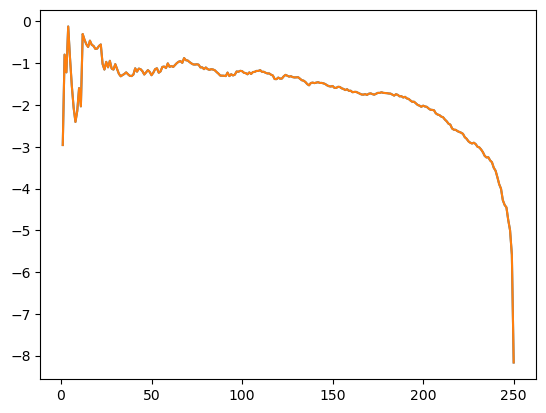

In [46]:
from tailnflows.torch_tails import pickands_estimator as pickands_estimator_t
from marginal_tail_adaptive_flows.utils.tail_estimation import pickands_estimator

k_p_arr, xi_p_arr = pickands_estimator(sorted_x)

t_k_p_arr, t_xi_p_arr = pickands_estimator_t(torch_sorted_x)

plt.plot(k_p_arr, xi_p_arr)
plt.plot(t_k_p_arr, t_xi_p_arr)

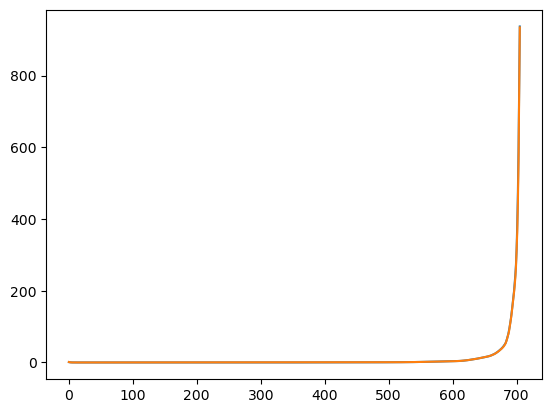

In [47]:
from tailnflows.torch_tails import _hill_double_bootstrap
from marginal_tail_adaptive_flows.utils.tail_estimation import hill_dbs

t_hbs = _hill_double_bootstrap(torch_sorted_x, t_bootstrap=0.5, r_bootstrap=500, eps_stop=1.0)

hbs_out = hill_dbs(sorted_x, t_bootstrap=0.5, r_bootstrap=500, eps_stop=1.0, diagn_plots=True)

plt.plot(t_hbs.n1_amse)
plt.plot(hbs_out[2])
plt.show()

In [48]:
from tailnflows.torch_tails import hill_bootstrap_estimator
from marginal_tail_adaptive_flows.utils.tail_estimation import hill_estimator


t_hbs = _hill_double_bootstrap(torch_sorted_x, t_bootstrap=0.5, r_bootstrap=500, eps_stop=1.0)

hbs_out = hill_estimator(sorted_x, t_bootstrap=0.5, r_bootstrap=500, eps_stop=1.0, diagn_plots=True)

t_hbs.xi_star, hbs_out[3]

Adjusted Hill estimated gamma: 0.0570512459564505
**********


(tensor(-1.0667, dtype=torch.float64), -1.060503018548785)